# 1. Data Scraping

In [2]:
import requests
import pandas as pd
import time

### a. Scrap product list

In [20]:
keywords = ["shuttlecock"]

url = "https://gql.tokopedia.com/graphql/SearchProductV5Query"
search_id = "20240527101010ABCDEF123456XYZ"

def get_params(keyword):
    params=[]
    for i in range(1,1000):
        param = "device=desktop&l_name=sre&navsource=&ob=5&page={}&q={}&related=true&rows=200&safe_search=false&sc=2272&scheme=https&search_id={}&shipping=&show_adult=false&source=search&srp_component_id=04.06.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=170ef45885cd137480a7a34202ecf991&user_id=15548711&variants=".format(i,keyword,search_id, i*200)
        param = "device=desktop&l_name=sre&navsource=&ob=23&page={}&q={}&related=true&rows=60&safe_search=false&sc=1396&shipping=&show_adult=false&source=search&srp_component_id=04.06.00.00&srp_page_id=&srp_page_title=&st=product&start=0&topads_bucket=true&unique_id=170ef45885cd137480a7a34202ecf991&user_addressId=25256664&user_cityId=256&user_districtId=3605&user_id=15548711&user_lat=-7.680092399999999&user_long=110.3432146&user_postCode=55514&user_warehouseId=0&variants=&warehouses=".format(i,keyword,search_id, i*200)

        params.append(param)
    
    return params
# navsource=&ob=5&q=essential%20oil&sc=2272&search_id=20250422220831DB8EC35670CB6B1B4XK1&srp_component_id=04.06.00.00&srp_page_id=&srp_page_title=&st=
# device=desktop&l_name=sre&navsource=&ob=5&page=1&q=essential%20oil&related=true&rows=60&safe_search=false&sc=2272&scheme=https&search_id=20250422220831DB8EC35670CB6B1B4XK1&shipping=&show_adult=false&source=search&srp_component_id=04.06.00.00&srp_page_id=&srp_page_title=&st=product&start=0&topads_bucket=true&unique_id=170ef45885cd137480a7a34202ecf991&user_id=15548711&variants=
def scrape_data(param):
    headers = {
    "Content-Type": "application/json",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
    }

    payload = [{
        "operationName":"SearchProductV5Query",
        "variables": {
            "params":param

        },
        "query":"query SearchProductV5Query($params: String!) {\n  searchProductV5(params: $params) {\n    header {\n      totalData\n      responseCode\n      keywordProcess\n      keywordIntention\n      componentID\n      isQuerySafe\n      additionalParams\n      backendFilters\n      __typename\n    }\n    data {\n      totalDataText\n      banner {\n        position\n        text\n        applink\n        url\n        imageURL\n        componentID\n        trackingOption\n        __typename\n      }\n      redirection {\n        url\n        __typename\n      }\n      related {\n        relatedKeyword\n        position\n        trackingOption\n        otherRelated {\n          keyword\n          url\n          applink\n          componentID\n          products {\n            oldID: id\n            id: id_str_auto_\n            name\n            url\n            applink\n            mediaURL {\n              image\n              __typename\n            }\n            shop {\n              oldID: id\n              id: id_str_auto_\n              name\n              city\n              tier\n              __typename\n            }\n            badge {\n              oldID: id\n              id: id_str_auto_\n              title\n              url\n              __typename\n            }\n            price {\n              text\n              number\n              __typename\n            }\n            freeShipping {\n              url\n              __typename\n            }\n            labelGroups {\n              position\n              title\n              type\n              url\n              styles {\n                key\n                value\n                __typename\n              }\n              __typename\n            }\n            rating\n            wishlist\n            ads {\n              id\n              productClickURL\n              productViewURL\n              productWishlistURL\n              tag\n              __typename\n            }\n            meta {\n              oldWarehouseID: warehouseID\n              warehouseID: warehouseID_str_auto_\n              componentID\n              __typename\n            }\n            __typename\n          }\n          __typename\n        }\n        __typename\n      }\n      suggestion {\n        currentKeyword\n        suggestion\n        query\n        text\n        componentID\n        trackingOption\n        __typename\n      }\n      ticker {\n        oldID: id\n        id: id_str_auto_\n        text\n        query\n        applink\n        componentID\n        trackingOption\n        __typename\n      }\n      violation {\n        headerText\n        descriptionText\n        imageURL\n        ctaURL\n        ctaApplink\n        buttonText\n        buttonType\n        __typename\n      }\n      products {\n        oldID: id\n        id: id_str_auto_\n        name\n        url\n        applink\n        mediaURL {\n          image\n          image300\n          videoCustom\n          __typename\n        }\n        shop {\n          oldID: id\n          id: id_str_auto_\n          name\n          url\n          city\n          tier\n          __typename\n        }\n        badge {\n          oldID: id\n          id: id_str_auto_\n          title\n          url\n          __typename\n        }\n        price {\n          text\n          number\n          range\n          original\n          discountPercentage\n          __typename\n        }\n        freeShipping {\n          url\n          __typename\n        }\n        labelGroups {\n          position\n          title\n          type\n          url\n          styles {\n            key\n            value\n            __typename\n          }\n          __typename\n        }\n        labelGroupsVariant {\n          title\n          type\n          typeVariant\n          hexColor\n          __typename\n        }\n        category {\n          oldID: id\n          id: id_str_auto_\n          name\n          breadcrumb\n          gaKey\n          __typename\n        }\n        rating\n        wishlist\n        ads {\n          id\n          productClickURL\n          productViewURL\n          productWishlistURL\n          tag\n          __typename\n        }\n        meta {\n          oldParentID: parentID\n          parentID: parentID_str_auto_\n          oldWarehouseID: warehouseID\n          warehouseID: warehouseID_str_auto_\n          isImageBlurred\n          isPortrait\n          __typename\n        }\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n}\n"

    }]

    req = req = requests.post(url, json=payload, headers=headers).json()
    rows = req[0]['data']['searchProductV5']['data']['products']
    # print(len(rows))
    stop=False
    scrape_data = []
    
    for i in range(0, len(rows)):
        product_id = rows[i]['id']
        old_product_id = rows[i]['meta']['oldParentID']
        nama_produk = rows[i]['name']
        harga = rows[i]['price']['number']
        rating = rows[i]['rating']
        toko = rows[i]['shop']['name']
        toko_url = rows[i]['shop']['url']
        lokasi = rows[i]['shop']['city']
        product_url = rows[i]['url']
        category = rows[i]['category']['name']
        scrape_data.append((str(product_id),
                            str(old_product_id),
                            nama_produk, 
                            harga, 
                            rating, 
                            toko, 
                            toko_url, 
                            lokasi, 
                            product_url,
                            category,
                            keyword))
    
    if len(scrape_data)==0:
        stop=True
    # print((product_id), "  ", old_product_id)
    return scrape_data, stop
all_data = []
for keyword in keywords:
    stop = False
    params = get_params(keyword)
    
    for i in range(0,len(params)):
        param = params[i]
        data,stop = scrape_data(param)
        all_data.extend(data)
        print(i)
        if stop == True:
            break
    print(keyword)

df = pd.DataFrame(all_data, columns=['product_id',
                                     'old_product_id',
                                    'nama_produk',
                                    'harga',
                                    'rating',
                                    'toko',
                                    'toko_url',
                                    'lokasi',
                                    'product_url',
                                    'category',
                                    'keyword'])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
shuttlecock


In [10]:
df

,product_id,old_product_id,nama_produk,harga,rating,toko,toko_url,lokasi,product_url,category,keyword


In [3]:
df.to_csv('produk.csv', index=False)

### b. Scrap reviews

In [3]:
j=0
df = pd.read_csv(f"D:\Kuliah\Semester 8\Kepstun 1 2\Dashboard\Testdrive\products_tokopedia.csv", index_col=False)
product_ids = [
    b if a == 0 else a
    for a, b, c in zip(df["old_product_id"], df["product_id"], df["rating"])
    if pd.notna(c)
]


url = "https://gql.tokopedia.com/graphql/productReviewList"


def get_params():
    params=[]
    for i in range(1,90):
        param = "device=desktop&l_name=sre&navsource=&ob=23&page={}&q={}&related=true&rows=200&safe_search=false&scheme=https&shipping=&show_adult=false&source=search&srp_component_id=02.01.00.00&srp_page_id=&srp_page_title=&st=product&start={}&topads_bucket=true&unique_id=170ef45885cd137480a7a34202ecf991&user_id=15548711&variants=".format(i,keyword, i*200)
        params.append(param)
    
    return params

def scrape_data(product_id,pages):
    global j
    headers = {
    "Content-Type": "application/json",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
    }

    payload = [{
        'operationName':"productReviewList",
        'query': "query productReviewList($productID: String!, $page: Int!, $limit: Int!, $sortBy: String, $filterBy: String) {\n  productrevGetProductReviewList(productID: $productID, page: $page, limit: $limit, sortBy: $sortBy, filterBy: $filterBy) {\n    productID\n    list {\n      id: feedbackID\n      variantName\n      message\n      productRating\n      reviewCreateTime\n      reviewCreateTimestamp\n      isReportable\n      isAnonymous\n      imageAttachments {\n        attachmentID\n        imageThumbnailUrl\n        imageUrl\n        __typename\n      }\n      videoAttachments {\n        attachmentID\n        videoUrl\n        __typename\n      }\n      reviewResponse {\n        message\n        createTime\n        __typename\n      }\n      user {\n        userID\n        fullName\n        image\n        url\n        __typename\n      }\n      likeDislike {\n        totalLike\n        likeStatus\n        __typename\n      }\n      stats {\n        key\n        formatted\n        count\n        __typename\n      }\n      badRatingReasonFmt\n      __typename\n    }\n    shop {\n      shopID\n      name\n      url\n      image\n      __typename\n    }\n    hasNext\n    totalReviews\n    __typename\n  }\n}\n",
        'variables': {
            'productID': product_id, 
            'page': pages, 
            'limit': 50, 
            'sortBy': "informative_score desc", 
            'filterBy': ""
            }
    }]


    req = req = requests.post(url, json=payload, headers=headers).json()
    rows = req[0]['data']['productrevGetProductReviewList']['list']
    # print(len(rows))
    stop=False
    scrape_data = []
    for i in range(0, len(rows)):
        ulasan = rows[i]['message']
        rating = rows[i]['productRating']
        time = rows[i]['reviewCreateTime']
        scrape_data.append((product_id,
                    ulasan, 
                    rating, 
                    time
                    ))
        j = j+1
        print('Ulasan : ', j)
        
    if len(scrape_data)==0:
        stop=True

    return scrape_data,stop

# params = get_params()
all_data = []
k=0



In [4]:
import time

try:
    for id in product_ids[:10800]:
        print('Id : ', k)
        k = k + 1
        for i in range(0,10000):
            
            param = params[i]
            data,stop = scrape_data(str(id),i+1)
            all_data.extend(data)
            print(i)
            if stop == True:
                break
            time.sleep(0.1)
except Exception as a:
    print(a)
    df = pd.DataFrame(all_data, columns=['product_id',
                                        'ulasan',
                                        'rating',
                                        'time'])

Id :  0
Ulasan :  1
Ulasan :  2
Ulasan :  3
Ulasan :  4
Ulasan :  5
Ulasan :  6
Ulasan :  7
Ulasan :  8
Ulasan :  9
Ulasan :  10
Ulasan :  11
Ulasan :  12
Ulasan :  13
Ulasan :  14
Ulasan :  15
Ulasan :  16
Ulasan :  17
Ulasan :  18
Ulasan :  19
Ulasan :  20
Ulasan :  21
Ulasan :  22
Ulasan :  23
Ulasan :  24
Ulasan :  25
Ulasan :  26
Ulasan :  27
Ulasan :  28
Ulasan :  29
Ulasan :  30
Ulasan :  31
Ulasan :  32
Ulasan :  33
Ulasan :  34
Ulasan :  35
Ulasan :  36
Ulasan :  37
Ulasan :  38
Ulasan :  39
Ulasan :  40
Ulasan :  41
Ulasan :  42
Ulasan :  43
Ulasan :  44
Ulasan :  45
Ulasan :  46
Ulasan :  47
Ulasan :  48
Ulasan :  49
Ulasan :  50
0
Ulasan :  51
Ulasan :  52
Ulasan :  53
Ulasan :  54
Ulasan :  55
Ulasan :  56
Ulasan :  57
Ulasan :  58
Ulasan :  59
Ulasan :  60
Ulasan :  61
Ulasan :  62
Ulasan :  63
Ulasan :  64
Ulasan :  65
Ulasan :  66
Ulasan :  67
Ulasan :  68
Ulasan :  69
Ulasan :  70
Ulasan :  71
Ulasan :  72
Ulasan :  73
Ulasan :  74
Ulasan :  75
Ulasan :  76
Ulasan :  7

KeyboardInterrupt: 

In [11]:
df.to_csv('ulasan.csv', index=False)

# 2. Data Preprocessing + Cleaning

### a. Merge Review and Metadata

In [19]:
import pandas as pd

# Load data dari CSV
produk = pd.read_csv('produk.csv')
ulasan = pd.read_csv('ulasan.csv')

# Merge berdasarkan product_id dengan kolom 'product_id' di produk.csv
merge1 = ulasan.merge(produk, on='product_id', how='left')

# Cari baris ulasan yang belum ter-merge (karena tidak cocok di 'product_id')
belum_termerge = merge1[merge1['nama_produk'].isna()]

# Coba merge ulang baris-baris tersebut berdasarkan old_product_id
merge2 = belum_termerge.drop(columns=produk.columns.difference(['old_product_id'], keep='first'), errors='ignore') \
                       .merge(produk, left_on='product_id', right_on='old_product_id', how='left')

# Gabungkan hasil merge yang sukses di langkah pertama dan kedua
hasil_akhir = pd.concat([
    merge1[~merge1['nama_produk'].isna()],
    merge2
])

# Reset index agar rapi
hasil_akhir.reset_index(drop=True, inplace=True)

# Tampilkan atau simpan
hasil_akhir


TypeError: Index.difference() got an unexpected keyword argument 'keep'

### b. Cleaning ulasan

In [2]:
import pandas as pd
import re
import string
from tqdm import tqdm
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.corpus import stopwords

In [3]:
df = pd.read_csv(f"D:\Kuliah\Semester 8\Riset\Kepenulisan\Processing\\reviews_tokopedia_SC_46k.csv" , 
                    index_col= False)


In [21]:
# Global preparation
factory = StemmerFactory()
stemmer = factory.create_stemmer()

kamus_alay2 = pd.read_csv('https://raw.githubusercontent.com/nasalsabila/kamus-alay/master/colloquial-indonesian-lexicon.csv')
kamus_alay2 = kamus_alay2.filter(['slang', 'formal'], axis=1).drop_duplicates(subset=['slang'], keep='first').set_index('slang')

stopword_list = list(stopwords.words('indonesian'))
custom_stopwords = ["sih", "lho"]

# 1. Clean Formatting

def remove_emojis(text):
    emoji_pattern = re.compile(
        "[\U0001F600-\U0001F64F]|"  # Emotikon wajah
        "[\U0001F300-\U0001F5FF]|"  # Simbol & ikon
        "[\U0001F680-\U0001F6FF]|"  # Transportasi & simbol terkait
        "[\U0001F1E0-\U0001F1FF]+"  # Bendera
        , flags=re.UNICODE
    )
    return emoji_pattern.sub(r"", text)

def clean_formatting(text):
    text = remove_emojis(text) 
    text = re.sub(r'http\S+', '', text)
    text = re.sub('(@\w+|#\w+)', '', text)
    text = re.sub('<.*?>', '', text)

    text = ''.join(' ' if c in string.punctuation else c for c in text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub("\n", " ", text)
    text = text.lower()
    text = re.sub(r"(username|user|url|rt|xf|fx|xe|xa)\s|\s(user|url|rt|xf|fx|xe|xa)", "", text)
    text = re.sub(r'(\w)\1{2,}', r'\1', text)
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    text = ' '.join(text.split())
    return text

# 2. Replace Slang
def replace_slang(text, kamus=kamus_alay2):
    words = text.split()
    for i in range(len(words)):
        if words[i] in kamus.index:
            words[i] = kamus.loc[words[i]]['formal']
    return ' '.join(words)

# 3. Apply Stemming
def apply_stemming(text, stemmer=stemmer):
    return stemmer.stem(text)

# 4. Remove Stopwords
def remove_stopwords(text, stopwords=stopword_list, custom=custom_stopwords):
    words = text.split()
    return ' '.join([word for word in words if word not in stopwords and word not in custom])

# 5. Full Cleaning Pipeline
def full_cleaning_pipeline(text):
    text = clean_formatting(text)
    text = replace_slang(text)
    text = apply_stemming(text)
    text = remove_stopwords(text)
    return text

# 6. Clean DataFrame
def clean_dataframe(df, col_name, min_rows=None):
    df[col_name] = df[col_name].astype(str)
    if min_rows is None:
        min_rows = len(df)
    if len(df) < min_rows:
        raise ValueError("Jumlah Data Yang Diinginkan melebihi Data yang Ada")

    cleaned_data = []
    for i in range(min_rows):
        raw_text = df.loc[i, col_name]
        cleaned = full_cleaning_pipeline(raw_text)
        cleaned_data.append(cleaned)
        if i % 10 == 0:
            print(f"Memproses {i} data", end="\r")

    df = df.iloc[:min_rows].copy()
    df["cleaned"] = cleaned_data
    return df


In [ ]:
df_cleaned = clean_dataframe(df, "ulasan")

### c. Validating ulasan

In [4]:
import pandas as pd

def filter_short_reviews(df, column='ulasan'):
    df[column] = df[column].astype(str).fillna("")
    return df[df[column].apply(lambda x: len(x.split()) >= 3)].reset_index(drop=True)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def jaccard_similarity(str1, str2):
    a, b = set(str1.split()), set(str2.split())
    return float(len(a & b)) / len(a | b) if b else 0

def remove_duplicates(df, column='review', threshold=0.9):
    tfidf = TfidfVectorizer().fit_transform(df[column])
    cos_sim = cosine_similarity(tfidf)

    to_drop = set()
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            if j in to_drop:
                continue
            if cos_sim[i, j] > threshold:
                if jaccard_similarity(df[column][i], df[column][j]) > threshold:
                    to_drop.add(j)

    return df.drop(index=list(to_drop)).reset_index(drop=True)


In [ ]:
import stanza
from collections import Counter

# Setup Stanza (Bahasa Indonesia)
stanza.download('id')
nlp = stanza.Pipeline('id')

def linguistic_analysis(df, column='review'):
    all_words = []
    pos_counts = Counter()

    for text in df[column]:
        doc = nlp(text)
        for sentence in doc.sentences:
            for word in sentence.words:
                all_words.append(word.text.lower())
                pos_counts[word.upos] += 1

    keyword_freq = Counter(all_words).most_common(20)
    return keyword_freq, pos_counts


In [5]:
def validate_reviews(df, text_column='review'):
    print("Step 1: Removing short reviews...")
    df = filter_short_reviews(df, text_column)
    print(f"Remaining after filter: {len(df)}")

    print("Step 2: Removing duplicates...")
    # df = remove_duplicates(df, text_column)
    print(f"Remaining after duplicate removal: {len(df)}")

    # print("Step 3: Analyzing linguistic anomalies...")
    # keyword_freq, pos_dist = linguistic_analysis(df, text_column)

    # print("Top keywords:", keyword_freq)
    # print("POS distribution:", pos_dist)

    return df


In [8]:
# df_cleaned = validate_reviews(df_cleaned, "cleaned")
df_cleaned = validate_reviews(df, "ulasan")

Step 1: Removing short reviews...
Remaining after filter: 35542
Step 2: Removing duplicates...
Remaining after duplicate removal: 35542


### Saving cleaned dataframe

In [9]:
df_cleaned.to_csv(f"D:\Kuliah\Semester 8\Riset\Kepenulisan\Processing\\reviews_tokopedia_SC_35k_cleaned.csv", index= False)

In [11]:
import pandas as pd
from collections import Counter
import re
from nltk.tokenize import word_tokenize # Anda mungkin perlu menginstal nltk: pip install nltk
# Pastikan Anda telah mengunduh resource NLTK yang diperlukan:
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')
from nltk.corpus import stopwords

def temukan_kata_sering_muncul(nama_file_csv, nama_kolom, jumlah_kata_teratas=20, bahasa_stopwords='indonesian'):
    """
    Mengidentifikasi kata-kata yang sering muncul dari kolom tertentu dalam file CSV.

    Args:
        nama_file_csv (str): Path ke file CSV.
        nama_kolom (str): Nama kolom yang berisi teks.
        jumlah_kata_teratas (int): Jumlah kata teratas yang ingin ditampilkan.
        bahasa_stopwords (str): Bahasa untuk stopwords (misalnya, 'indonesian', 'english').

    Returns:
        collections.Counter: Objek Counter yang berisi kata-kata dan frekuensinya,
                             atau None jika terjadi error.
    """
    try:
        # 1. Baca file CSV
        df = pd.read_csv(nama_file_csv)

        # Pastikan kolom yang diminta ada di DataFrame
        if nama_kolom not in df.columns:
            print(f"Error: Kolom '{nama_kolom}' tidak ditemukan di file CSV '{nama_file_csv}'.")
            print(f"Kolom yang tersedia adalah: {list(df.columns)}")
            return None

        # 2. Ambil teks dari kolom yang ditentukan dan gabungkan menjadi satu string besar
        # Hapus nilai NaN jika ada dan konversi ke string
        # Pastikan hanya memproses baris di mana kolom tersebut tidak kosong
        teks_kolom = df[nama_kolom].dropna().astype(str)
        if teks_kolom.empty:
            print(f"Tidak ada data teks yang valid di kolom '{nama_kolom}' setelah menghapus nilai kosong.")
            return Counter() # Kembalikan Counter kosong

        teks_lengkap = ' '.join(teks_kolom.tolist())

        # 3. Pra-pemrosesan teks:
        #    a. Ubah ke huruf kecil
        teks_lengkap = teks_lengkap.lower()
        #    b. Hapus angka dan tanda baca (kecuali spasi), serta karakter non-alfanumerik lainnya
        #       Regex ini akan mempertahankan huruf dan spasi saja.
        teks_lengkap = re.sub(r'[^a-z\s]', '', teks_lengkap)
        #    c. Tokenisasi (memecah teks menjadi kata-kata)
        tokens = word_tokenize(teks_lengkap)

        # 4. Hapus stopwords (kata-kata umum yang tidak bermakna)
        try:
            daftar_stopwords = set(stopwords.words(bahasa_stopwords))
        except OSError:
            print(f"Dataset stopwords untuk '{bahasa_stopwords}' belum diunduh.")
            print("Silakan jalankan kode berikut di interpreter Python Anda untuk mengunduhnya:")
            print("import nltk")
            print(f"nltk.download('stopwords')")
            print(f"nltk.download('punkt')") # Punkt juga diperlukan untuk tokenisasi
            return None
        except LookupError: # Menangani jika bahasa tidak dikenal oleh NLTK
            print(f"Bahasa stopwords '{bahasa_stopwords}' tidak ditemukan oleh NLTK.")
            print("Pastikan Anda menggunakan kode bahasa yang benar (misalnya, 'english', 'indonesian').")
            return None


        kata_tanpa_stopwords = [kata for kata in tokens if kata not in daftar_stopwords and len(kata) > 1] # juga filter kata dengan 1 huruf

        # 5. Hitung frekuensi kemunculan setiap kata
        frekuensi_kata = Counter(kata_tanpa_stopwords)

        # 6. Tampilkan kata-kata yang paling sering muncul
        if not frekuensi_kata:
            print(f"Tidak ada kata yang ditemukan di kolom '{nama_kolom}' setelah pra-pemrosesan dan penghapusan stopwords.")
        else:
            print(f"\nKata-kata yang paling sering muncul (tanpa stopwords umum) di kolom '{nama_kolom}':")
            for kata, jumlah in frekuensi_kata.most_common(jumlah_kata_teratas):
                print(f"- {kata}: {jumlah}")

            print("\nPerhatikan kata-kata di atas. Beberapa mungkin masih merupakan 'stop words' spesifik untuk dataset Anda.")
            print("Anda bisa menambahkan kata-kata tersebut ke daftar stopwords kustom untuk analisis topik yang lebih baik.")

        return frekuensi_kata

    except FileNotFoundError:
        print(f"Error: File '{nama_file_csv}' tidak ditemukan. Pastikan path file sudah benar.")
        return None
    except pd.errors.EmptyDataError:
        print(f"Error: File CSV '{nama_file_csv}' kosong.")
        return None
    except Exception as e:
        print(f"Terjadi kesalahan saat memproses file '{nama_file_csv}': {e}")
        return None

# --- Penggunaan dengan File CSV Asli Anda ---
if __name__ == "__main__":
    # ---------------------------------------------------------------------------
    # TODO: GANTI NILAI DI BAWAH INI DENGAN INFORMASI FILE CSV ANDA
    # ---------------------------------------------------------------------------
    # Contoh:
    # nama_file_saya = 'data/ulasan_produk.csv'
    # kolom_teks_saya = 'isi_ulasan'
    # bahasa_teks_saya = 'indonesian' # atau 'english', dll.
    # jumlah_kata_ditampilkan = 50

    nama_file_saya = f"D:\Kuliah\Semester 8\Riset\Kepenulisan\Processing\\reviews_tokopedia_SC_46k.csv"  # <--- GANTI INI
    kolom_teks_saya = 'ulasan'       # <--- GANTI INI
    bahasa_teks_saya = 'indonesian'                        # Sesuaikan jika perlu
    jumlah_kata_ditampilkan = 200                           # Sesuaikan jika perlu
    # ---------------------------------------------------------------------------

    print(f"Mencoba memuat file: {nama_file_saya}")
    print(f"Mencari kata-kata di kolom: {kolom_teks_saya}")
    print(f"Bahasa stopwords: {bahasa_teks_saya}")
    print(f"Jumlah kata teratas untuk ditampilkan: {jumlah_kata_ditampilkan}")

    # Panggil fungsi untuk mendapatkan frekuensi kata
    frekuensi = temukan_kata_sering_muncul(
        nama_file_saya,
        kolom_teks_saya,
        jumlah_kata_teratas=jumlah_kata_ditampilkan,
        bahasa_stopwords=bahasa_teks_saya
    )

    # Jika Anda ingin mendapatkan daftar kata yang sering muncul untuk dijadikan stopwords kustom:
    if frekuensi and frekuensi.most_common(): # Pastikan frekuensi tidak None dan tidak kosong
        # Anda bisa menyesuaikan ambang batas frekuensi atau jumlah kata
        # Misalnya, ambil 15 kata teratas yang paling sering muncul sebagai kandidat stopwords kustom
        jumlah_kandidat_stopwords = 15
        kata_kandidat_stopwords = [kata for kata, jumlah in frekuensi.most_common(jumlah_kandidat_stopwords)]
        print(f"\n{jumlah_kandidat_stopwords} kata teratas yang bisa dipertimbangkan sebagai stopwords kustom (berdasarkan frekuensi):")
        print(kata_kandidat_stopwords)
        print("Analisis kata-kata ini dan tentukan mana yang tidak relevan untuk pemodelan topik Anda.")
    elif frekuensi is not None: # Jika frekuensi adalah Counter kosong
        print("\nTidak ada kata yang cukup signifikan untuk dijadikan kandidat stopwords kustom.")

Mencoba memuat file: D:\Kuliah\Semester 8\Riset\Kepenulisan\Processing\reviews_tokopedia_SC_46k.csv
Mencari kata-kata di kolom: ulasan
Bahasa stopwords: indonesian
Jumlah kata teratas untuk ditampilkan: 200

Kata-kata yang paling sering muncul (tanpa stopwords umum) di kolom 'ulasan':
- barang: 8789
- cepat: 8728
- sesuai: 8113
- bagus: 7817
- packing: 5892
- pengiriman: 5664
- aman: 5217
- kualitas: 4777
- mantap: 4321
- nya: 3819
- seller: 3762
- respon: 3078
- ok: 3026
- harga: 2957
- yg: 2937
- pesanan: 2813
- terima: 2347
- awet: 2225
- produk: 2186
- gak: 2127
- kasih: 2095
- mudah: 1936
- bahan: 1829
- semoga: 1738
- rontok: 1686
- rapi: 1655
- lumayan: 1633
- deskripsi: 1623
- oke: 1549
- gan: 1391
- beli: 1296
- diterima: 1259
- recommended: 1254
- fast: 1244
- cock: 1175
- shuttlecock: 1162
- murah: 1162
- banget: 1157
- good: 1152
- terimakasih: 1133
- main: 1099
- penjual: 1091
- bulu: 1076
- order: 1068
- thanks: 1061
- enak: 1015
- ya: 1007
- toko: 949
- barangnya: 948
- 

# 3. Topic Extraction

In [32]:
import bertopic as BERTopic

#### Load docs

In [33]:
docs = pd.read_csv('ulasan_cleaned.csv', index_col=False)
docs = docs["cleaned"].astype(str).tolist()

In [40]:
docs

['amazing kirim cepat banget malam pesan besok siang packing rapi plus free sample',
 'langgan kagak comment',
 'kirim cepat pesan langsung kirim kurir hehehe kasih bintang toko bonus',
 'beli ok terima kasih',
 'layan super cepat pesan malam malam service the best aroma best',
 'layan cepat wangi fresh banget',
 'wangi ok suka produk beli',
 'salah kirim ya pesan eucalyptus kirim pepermint ya tolong ditykar ya',
 'kasih bonus scent orange mini',
 'coba kirim cepat an packing oke note and bonus tq',
 'bau enak cair banget produk oke respon seller cepat banget bonus',
 'packing rapi kirim cepat product mantap langsung coba diff',
 'barang bagus free sample admin ramah cepat',
 'sesuai pesan thank you barang lengkap',
 'jual mantab packing chat sopan kirim cepat dipacking dus shg kes mewah',
 'proses cepat packing rapi produk sesuai deskripsi wangi nya enak',
 'order sekian good quality harga kompetitif slowly but sure alih brand famous thank seller',
 'beli paket tester pine needle than

#### Parameter

In [35]:
from sentence_transformers import SentenceTransformer

# Pre-calculate embeddings
embedding_model = SentenceTransformer("paraphrase-multilingual-MiniLM-L12-v2")
embeddings = embedding_model.encode(docs, show_progress_bar=True)

Batches: 100%|██████████| 684/684 [02:45<00:00,  4.14it/s]


In [41]:
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

In [42]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=30, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(min_df=2, ngram_range=(1, 2))

In [44]:
import stanza
from bertopic import BERTopic
from bertopic.representation._base import BaseRepresentation

# Load Bahasa Indonesia Stanza model
stanza.download('id')
nlp = stanza.Pipeline('id')

class StanzaPOS(BaseRepresentation):
    def __init__(self, pos_tags=["NOUN", "PROPN"]):
        self.pos_tags = pos_tags
    
    def __call__(self, words, embeddings=None, centroid=None):
        filtered = []
        doc = nlp(' '.join(words))
        for sent in doc.sentences:
            for word in sent.words:
                if word.upos in self.pos_tags:
                    filtered.append(word.text.lower())
        return list(set(filtered))

KeyboardInterrupt: 

In [45]:
import openai
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, OpenAI, PartOfSpeech

keybert_model = KeyBERTInspired()
# pos_model = StanzaPOS(pos_tags=["NOUN", "PROPN"])
mmr_model = MaximalMarginalRelevance(diversity=0.3)

prompt = """
Saya memiliki sebuah topik yang berisi dokumen-dokumen berikut mengenai ulasan produk:
[DOCUMENTS]

Topik ini dideskripsikan oleh kata kunci berikut: [KEYWORDS]

Berdasarkan informasi di atas, ekstrak sebuah label topik yang pendek (maksimal 3 kata) namun sangat deskriptif. Label ini harus secara spesifik merepresentasikan **dimensi kepuasan pelanggan terhadap produk**.

Contoh dimensi kepuasan yang relevan bisa meliputi (namun tidak terbatas pada):
- Kecepatan terbang
- Ketahanan bulu 
- Kualitas gabus
- Kestabilan terbang
- Kesesuaian harga 
- Konsistensi kualitas slop

Pastikan output dalam format berikut:: <topic label>
"""

client = openai.OpenAI()
openai_model = OpenAI(client, model="gpt-4o-mini", exponential_backoff=True, chat=True, prompt=prompt)

# All representation models
representation_model = [
    # keybert_model,
    openai_model,  # Uncomment if you will use OpenAI
    # mmr_model,
    #pos_model
    ]


In [48]:
from bertopic import BERTopic

topic_model = BERTopic(
  language="multilingual",
  calculate_probabilities=True,
  # Pipeline models
  embedding_model=embedding_model,
  umap_model=umap_model,
  hdbscan_model=hdbscan_model,
  vectorizer_model=vectorizer_model,
  representation_model=representation_model,

  # Hyperparameters
  top_n_words=2,
  verbose=True
)

topics, probs = topic_model.fit_transform(docs, embeddings)

2025-06-02 16:22:28,482 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


2025-06-02 16:23:10,051 - BERTopic - Dimensionality - Completed ✓
2025-06-02 16:23:10,054 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-06-02 16:23:26,727 - BERTopic - Cluster - Completed ✓
2025-06-02 16:23:26,740 - BERTopic - Representation - Fine-tuning topics using representation models.
100%|██████████| 76/76 [01:07<00:00,  1.12it/s]
2025-06-02 16:24:36,459 - BERTopic - Representation - Completed ✓


In [ ]:
from bertopic import BERTopic
from bertopic.representation import MaximalMarginalRelevance

# Asumsikan 'topic_model' sudah dilatih sebelumnya
# topic_model = BERTopic(...)
# topics, probs = topic_model.fit_transform(docs, embeddings)

# Inisialisasi model representasi MMR yang baru
new_mmr_model = MaximalMarginalRelevance(diversity=0.3) # Mungkin dengan parameter diversity yang berbeda

# Perbarui representasi topik menggunakan MMR
# Penting: Anda perlu menyediakan dokumen asli ('docs') lagi
topic_model.update_topics(docs, representation_model=new_mmr_model)

# Representasi topik sekarang telah diperbarui dengan MMR


    Topic  Count                                    Name  \
0      -1   4570             -1_layan_cepat_kirim_seller   
1       0   4083                  0_wangi_aroma_bau_suka   
2       1   1507               1_oil_minyak_oilnya_putih   
3       2   1363           2_bagus_barang_sesuai_manfaat   
4       3    563             3_cepat_kirim_barang_sesuai   
..    ...    ...                                     ...   
71     70     36  70_paket_lengkap_tenkyuu_alhamdullilah   
72     71     34    71_lavender_oil_aromatheraphy_minyak   
73     72     32    72_pesan_fastrespont_konsul_thankyou   
74     73     31          73_order_wangi_aroma_terbaique   
75     74     31           74_terimakasih_gift_rs_telfon   

                                       Representation  \
0   [layan, cepat, kirim, seller, produk, bagus, k...   
1   [wangi, aroma, bau, suka, segar, harga, aman, ...   
2   [oil, minyak, oilnya, putih, kayu, wangi, bau,...   
3   [bagus, barang, sesuai, manfaat, kualitas, ban.

In [51]:
topic_model.get_topic_info()#.to_csv("Topic.csv",index=False)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,4570,-1_layan_cepat_kirim_seller,"[layan, cepat, kirim, seller, produk, bagus, k...",[terima kasih paket terima pesan sesuai deskri...
1,0,4083,0_wangi_aroma_bau_suka,"[wangi, aroma, bau, suka, segar, harga, aman, ...","[wangi enak banget, wangi spareminynya enak, w..."
2,1,1507,1_oil_minyak_oilnya_putih,"[oil, minyak, oilnya, putih, kayu, wangi, bau,...","[essential oil nya oke, good essential oil rec..."
3,2,1363,2_bagus_barang_sesuai_manfaat,"[bagus, barang, sesuai, manfaat, kualitas, ban...","[teirmakaish barang bagus, barang sesuai deskr..."
4,3,563,3_cepat_kirim_barang_sesuai,"[cepat, kirim, barang, sesuai, bagus, kualitas...","[barang bagus kirim cepat, proses kirim cepat ..."
...,...,...,...,...,...
71,70,36,70_paket_lengkap_tenkyuu_alhamdullilah,"[paket, lengkap, tenkyuu, alhamdullilah, rekom...","[paket terima recommended, paket terima rapi, ..."
72,71,34,71_lavender_oil_aromatheraphy_minyak,"[lavender, oil, aromatheraphy, minyak, skin, b...",[respon jual cepat kirim cepat essential oil a...
73,72,32,72_pesan_fastrespont_konsul_thankyou,"[pesan, fastrespont, konsul, thankyou, tsbali,...",[barang terima aman sesuai deskripsi terima ka...
74,73,31,73_order_wangi_aroma_terbaique,"[order, wangi, aroma, terbaique, kalao, qualit...","[suka banget wangi repeat order sekian kali, s..."


# 4. Sentiment Analysis and CSD Classification

In [1]:
df = pd.read_csv("Labeled 1k SC.csv", index_col=False)

NameError: name 'pd' is not defined

In [6]:
import pandas as pd
from openai import OpenAI
import time

# Inisialisasi OpenAI client
# client = OpenAI()
# client = OpenAI(api_key="sk-c99c6412363943799880c815951cc20f", base_url="https://api.deepseek.com")
client = OpenAI()

# Definisikan system role dengan instruksi tetap
system_prompt = """
ANALISIS ULASAN PRODUK MINYAK ATSIRI

Tugas:
Lakukan analisis terhadap ulasan produk ini dengan langkah-langkah berikut:
1. Deteksi CSD (Customer Satisfaction Dimension) jika disebutkan secara eksplisit terkait pembelian saat ini (bukan pembelian sebelumnya atau harapan).

2. Untuk setiap CSD:
- Tentukan sentimen: positif, netral, atau negatif.

3. Jika tidak ada CSD:
- Isi keterangan dengan salah satu dari:
a. harapan: hanya berisi harapan/ekspektasi
b. kepuasan_umum: puas tanpa menyebut alasan
c. emosi_umum: ekspresi perasaan umum tanpa konteks
d. sarkasme: gaya bahasa ambigu/sindirian
e. lainnya: jika tidak sesuai kategori di atas

4. Jika sentimen mengandung sindiran, sarkasme, atau ambiguitas, beri label keterangan: "sarkasme" walaupun CSD terdeteksi.

5. Output wajib dalam format JSON dengan struktur:
- csd: list objek {name, sentiment}
- keterangan: null atau string kategori (jika tidak ada CSD)
- jangan tulis sama sekali ```json... ``` didepan outputnya

CSD yang tersedia:
CSD: Kata Kunci Contoh

CSD yang tersedia:
CSD: Kata Kunci Contoh
1  {'Harga': ['murah', 'mahal', 'worth it', 'tidak sesuai harga'], 
2  'Kesesuaian Deskripsi': ['sesuai deskripsi', 'beda dengan foto', 'tidak sesuai info'], 
3  'Kondisi Paket': ['penyok', 'hancur', 'aman', 'utuh', 'terbuka'], 
4  'Pelayanan toko': ['ramah', 'fast response', 'slow response', 'tidak ditanggapi'], 
5  'Pengiriman': ['cepat', 'lama', 'delay', 'ekspedisi'], 
6  'Bulu': ['bulu', 'rontok', 'rapi'], 
7  'Batang bulu': ['batang', 'bulu patah'], 
8  'Stabilitas': ['goyang', 'stabil'], 
9  'Slop/Kemasan Kok': ['penyok', 'kemasan', 'aman'], 
10  'Kualitas Umum': ['kualitas'], 
11  'Gabus': ['gabus'], 
12  'Keawetan': ['awet', 'lama', 'tidak mudah rusak'], 
13  'Putaran kok': ['spin', 'berputar', 'susuan bulu berputar'], 
14  'Kemasan pengiriman': ['Bubble wrap', 'kemasan rapi', 'gulungan'], 
15  'Keutuhan isi slop': ['ada yang rusak', '1 buah rusak', 'semuanya kok bagus', 'tidak utuk', 'ada yang cacat']}
Format output dalam JSON:
    Contoh Input 1:
    "Barang datang cepat, kemasan rapi. Aroma lavender sangat autentik."

    Contoh Output 1:
    {
      "csd": [
        {"name": "Pengiriman", "sentiment": "positif"},
        {"name": "Kemasan", "sentiment": "positif"},
        {"name": "Aroma", "sentiment": "positif"}
      ],
      "keterangan": null
    }

    Contoh Input 2:
    "Semoga next order dapat bonus."

    Contoh Output 2:
    {
      "csd": [],
      "keterangan": "harapan"
    }

    
"""

# Fungsi untuk ekstraksi aspek dan chunking dengan prompt yang lebih hemat
def extract_aspects_and_chunk(text,bintang):
    completion = client.chat.completions.create(
        model="gpt-4o-mini",  # Model terbaru
        messages=[
            {"role": "system", "content": system_prompt},  # Instruksi tetap
            {"role": "user", "content": f"Ulasan yang akan diproses: {bintang}, Ulasan yang akan diproses: {text}"},  # Hanya teks parfum
        ],
        max_tokens=1000,
        temperature=0.4
    )

    return completion.choices[0].message.content.strip()

# Fungsi untuk memproses CSV
def process_csv(file_path, output_path):
    df = pd.read_csv(file_path, 
                     skiprows=range(1,6939+1389), 
                    nrows=5000,
                     index_col=False)
    df['dimensi'] = None

    for index, row in df.iterrows():
        text = row['ulasan']
        bintang = row['rating']
        # aspek = row['aspect']
        if pd.notna(text):
            try:
                chunked_result = extract_aspects_and_chunk(text,bintang)
                df.at[index, 'dimensi'] = chunked_result
            except Exception as e:
                print(f"Error processing row {index}: {e}")
                df.at[index, 'dimensi'] = "Error"

        if (index + 1) % 1 == 0:
            print(f"Processed {index + 1} rows...", end = "\r")
            df.to_csv(output_path, index=False)
            # time.sleep(1)

    df.to_csv(output_path, index=False)
    print(f"Processing completed. Output saved to {output_path}")

# Jalankan proses untuk file input dan output
input_file = 'labeled SC 5k_3.csv'
output_file = 'labeled SC 5k_2_2.csv'
process_csv(input_file, output_file)
#1381


KeyboardInterrupt: 

In [1]:
import pandas as pd
import json

# Urutan dimensi tetap
dimensi_urut = [
    "Aroma", "Bonus", "Harga", "Kemasan", "Kesesuaian Deskripsi",
    "Kondisi Paket", "Kualitas", "Manfaat", "Pelayanan",
    "Pengiriman", "Aplikasi Humidifier/Diffuser"
]

# Mapping sentimen
sentiment_map = {"positif": 1, "negatif": -1, "netral": 0}

# Fungsi untuk konversi per baris
def convert_to_one_hot(cell):
    try:
        # Handle jika ada \n atau escape character
        clean_str = cell.strip("`'\n ")
        if clean_str.startswith("json"):
            clean_str = clean_str[4:].strip()
        data = json.loads(clean_str)

        one_hot = [0] * len(dimensi_urut)
        for item in data.get("csd", []):
            name = item.get("name")
            sentiment = item.get("sentiment", "netral")
            if name in dimensi_urut:
                idx = dimensi_urut.index(name)
                one_hot[idx] = sentiment_map.get(sentiment, 0)
        return one_hot
    except Exception as e:
        return [0] * len(dimensi_urut)  # fallback jika parsing error

# Load CSV
df = pd.read_csv(r"D:\Kuliah\Semester 8\Riset\Kepenulisan\Processing APP\dataset_produk_lengkap.csv",index_col=False)  # Ganti dengan nama file kamu

# Proses kolom 'dimensi'
df['dimensi_vector'] = df['dimensi'].apply(convert_to_one_hot)

# Simpan ke CSV baru (opsional)
import pandas as pd

# Menampilkan semua kolom secara horizontal (tanpa potong)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 0)  # auto menyesuaikan terminal

df


,product_id,ulasan,rating_ulasan,time,old_product_id,nama_produk,harga,rating_produk,toko,toko_url,lokasi,product_url,category,keyword,dimensi,berat_produk,kuantitas,harga/ml,filter_segment_label,dimensi_vector
0,1.561966e+10,"sudah langganan di sini. packing selalu super aman dan rapih. kardus baru, produk di&#39;aman&#39;kan dengan banyak paper shreds 🤗 makasih bonus handsan nya kak 😁 makasih banyak 🙏",5,11/10/2023 10:02,3.508580e+08,Organic Supply Co - Helichrysum Essential Oil Organic - 5ml,620000,5.0,Organic Supply Co.,https=://www.tokopedia.com/organicsupplyco,Jakarta Barat,www.tokopedia.com/organicsupplyco/organic-supply-co-helichrysum-essential-oil-organic-5ml-5ml-november-2027-9a2c7?extParam=ivf%3Dfalse%26keyword%3Dessential+oil%26src%3Dsearch,Kesehatan,essential oil,"{""csd"": [{""name"": ""Kondisi Paket"", ""sentiment"": ""positif""}, {""name"": ""Bonus"", ""sentiment"": ""positif""}], ""keterangan"": null}",5,1,124000.0,Premium,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
1,1.265300e+09,Selesai semua dengan aman sampai ditempat pembeli,5,09/01/2025 10:13,1.265300e+09,"Sampel Sandalwood Kupang 100% Pure Essential Oil 2 ml, 5 ml, dan 10ml",200000,4.9,SESMU Essential Oil,https=://www.tokopedia.com/sesmu,Tangerang,www.tokopedia.com/sesmu/sampel-sandalwood-kupang-100-pure-essential-oil-2-ml-5-ml-dan-10ml-2-ml?extParam=ivf%3Dfalse%26keyword%3Dessential+oil%26src%3Dsearch,Kesehatan,essential oil,"{""csd"": [{""name"": ""Kondisi Paket"", ""sentiment"": ""positif""}], ""keterangan"": null}",2,1,100000.0,Premium,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
2,1.265300e+09,top seller 👍👍👍👍,5,17/02/2024 22:55,1.265300e+09,"Sampel Sandalwood Kupang 100% Pure Essential Oil 2 ml, 5 ml, dan 10ml",200000,4.9,SESMU Essential Oil,https=://www.tokopedia.com/sesmu,Tangerang,www.tokopedia.com/sesmu/sampel-sandalwood-kupang-100-pure-essential-oil-2-ml-5-ml-dan-10ml-2-ml?extParam=ivf%3Dfalse%26keyword%3Dessential+oil%26src%3Dsearch,Kesehatan,essential oil,"{""csd"": [], ""keterangan"": ""kepuasan_umum""}",2,1,100000.0,Premium,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,1.265300e+09,Orderan kedua kalinya....kwalitas sama...mantul...next order yg lebih besar....,5,16/07/2021 21:50,1.265300e+09,"Sampel Sandalwood Kupang 100% Pure Essential Oil 2 ml, 5 ml, dan 10ml",200000,4.9,SESMU Essential Oil,https=://www.tokopedia.com/sesmu,Tangerang,www.tokopedia.com/sesmu/sampel-sandalwood-kupang-100-pure-essential-oil-2-ml-5-ml-dan-10ml-2-ml?extParam=ivf%3Dfalse%26keyword%3Dessential+oil%26src%3Dsearch,Kesehatan,essential oil,"{""csd"": [{""name"": ""Kualitas"", ""sentiment"": ""positif""}], ""keterangan"": ""harapan""}",2,1,100000.0,Premium,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
4,1.265300e+09,"produk original sesuai deskripsi..mantapp...next order lagi,terimakasih",5,07/07/2021 18:49,1.265300e+09,"Sampel Sandalwood Kupang 100% Pure Essential Oil 2 ml, 5 ml, dan 10ml",200000,4.9,SESMU Essential Oil,https=://www.tokopedia.com/sesmu,Tangerang,www.tokopedia.com/sesmu/sampel-sandalwood-kupang-100-pure-essential-oil-2-ml-5-ml-dan-10ml-2-ml?extParam=ivf%3Dfalse%26keyword%3Dessential+oil%26src%3Dsearch,Kesehatan,essential oil,"{""csd"": [{""name"": ""Kesesuaian Deskripsi"", ""sentiment"": ""positif""}], ""keterangan"": ""kepuasan_umum""}",2,1,100000.0,Premium,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23063,1.457096e+10,Sudah diterima dgn baik,5,30/09/2024 12:50,0.000000e+00,Selensia Body Wash White Tea Moisturizing Contain Bergamot Essential Oil 500ml,47250,5.0,Selensia Essential Oil,https=://www.tokopedia.com/selensia,Bandung,www.tokopedia.com/selensia/selensia-body-wash-white-tea-moisturizing-contain-bergamot-essential-oil-500ml?extParam=ivf%3Dfalse%26keyword%3Dessential+oil%26src%3Dsearch,Kesehatan,essential oil,"{""csd"": [], ""keterangan"": ""kepuasan_umum""}",500,1,94.5,Low,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
23064,1.457096e+10,seger. pokonya josss,5,30/11/2024 23:38,0.000000e+00,Selensia Body Wash Whit

In [3]:
import ast
import pandas as pd


# df = pd.read_csv('Labeled_GPT_CSD_10k_2.csv', index_col=False)
# df = df.drop(columns=['aspect', 'true_tuple', 'sentiment', 'dimension'])


# Fungsi untuk mengonversi string list menjadi list Python
def convert_string_to_list(string):
    try:
        return ast.literal_eval(string)
    except:
        return []

# Terapkan konversi pada kolom "dimensi"
# df["dimensi_vector"] = df["dimensi_vector"].apply(convert_string_to_list)

# Fungsi untuk mengubah 8 indeks menjadi 16 indeks
def expand_sentiment(sentiment_list):
    expanded = []
    for val in sentiment_list:
        if val == 1:
            expanded.extend([1, 0])
        elif val == -1:
            expanded.extend([0, 1])
        else:
            expanded.extend([0, 0])
    return expanded

# Terapkan transformasi
df["dimensi_expanded"] = df["dimensi_vector"].apply(expand_sentiment)

df.to_csv(r"D:\Kuliah\Semester 8\Riset\Kepenulisan\Processing APP\dataset_produk_lengkap_onehot.csv", index=False)


In [4]:
df

,product_id,ulasan,rating_ulasan,time,old_product_id,nama_produk,harga,rating_produk,toko,toko_url,...,product_url,category,keyword,dimensi,berat_produk,kuantitas,harga/ml,filter_segment_label,dimensi_vector,dimensi_expanded
0,1.561966e+10,"sudah langganan di sini. packing selalu super aman dan rapih. kardus baru, produk di&#39;aman&#39;kan dengan banyak paper shreds 🤗 makasih bonus handsan nya kak 😁 makasih banyak 🙏",5,11/10/2023 10:02,3.508580e+08,Organic Supply Co - Helichrysum Essential Oil Organic - 5ml,620000,5.0,Organic Supply Co.,https=://www.tokopedia.com/organicsupplyco,...,www.tokopedia.com/organicsupplyco/organic-supply-co-helichrysum-essential-oil-organic-5ml-5ml-november-2027-9a2c7?extParam=ivf%3Dfalse%26keyword%3Dessential+oil%26src%3Dsearch,Kesehatan,essential oil,"{""csd"": [{""name"": ""Kondisi Paket"", ""sentiment"": ""positif""}, {""name"": ""Bonus"", ""sentiment"": ""positif""}], ""keterangan"": null}",5,1,124000.0,Premium,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,1.265300e+09,Selesai semua dengan aman sampai ditempat pembeli,5,09/01/2025 10:13,1.265300e+09,"Sampel Sandalwood Kupang 100% Pure Essential Oil 2 ml, 5 ml, dan 10ml",200000,4.9,SESMU Essential Oil,https=://www.tokopedia.com/sesmu,...,www.tokopedia.com/sesmu/sampel-sandalwood-kupang-100-pure-essential-oil-2-ml-5-ml-dan-10ml-2-ml?extParam=ivf%3Dfalse%26keyword%3Dessential+oil%26src%3Dsearch,Kesehatan,essential oil,"{""csd"": [{""name"": ""Kondisi Paket"", ""sentiment"": ""positif""}], ""keterangan"": null}",2,1,100000.0,Premium,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,1.265300e+09,top seller 👍👍👍👍,5,17/02/2024 22:55,1.265300e+09,"Sampel Sandalwood Kupang 100% Pure Essential Oil 2 ml, 5 ml, dan 10ml",200000,4.9,SESMU Essential Oil,https=://www.tokopedia.com/sesmu,...,www.tokopedia.com/sesmu/sampel-sandalwood-kupang-100-pure-essential-oil-2-ml-5-ml-dan-10ml-2-ml?extParam=ivf%3Dfalse%26keyword%3Dessential+oil%26src%3Dsearch,Kesehatan,essential oil,"{""csd"": [], ""keterangan"": ""kepuasan_umum""}",2,1,100000.0,Premium,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,1.265300e+09,Orderan kedua kalinya....kwalitas sama...mantul...next order yg lebih besar....,5,16/07/2021 21:50,1.265300e+09,"Sampel Sandalwood Kupang 100% Pure Essential Oil 2 ml, 5 ml, dan 10ml",200000,4.9,SESMU Essential Oil,https=://www.tokopedia.com/sesmu,...,www.tokopedia.com/sesmu/sampel-sandalwood-kupang-100-pure-essential-oil-2-ml-5-ml-dan-10ml-2-ml?extParam=ivf%3Dfalse%26keyword%3Dessential+oil%26src%3Dsearch,Kesehatan,essential oil,"{""csd"": [{""name"": ""Kualitas"", ""sentiment"": ""positif""}], ""keterangan"": ""harapan""}",2,1,100000.0,Premium,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,1.265300e+09,"produk original sesuai deskripsi..mantapp...next order lagi,terimakasih",5,07/07/2021 18:49,1.265300e+09,"Sampel Sandalwood Kupang 100% Pure Essential Oil 2 ml, 5 ml, dan 10ml",200000,4.9,SESMU Essential Oil,https=://www.tokopedia.com/sesmu,...,www.tokopedia.com/sesmu/sampel-sandalwood-kupang-100-pure-essential-oil-2-ml-5-ml-dan-10ml-2-ml?extParam=ivf%3Dfalse%26keyword%3Dessential+oil%26src%3Dsearch,Kesehatan,essential oil,"{""csd"": [{""name"": ""Kesesuaian Deskripsi"", ""sentiment"": ""positif""}], ""keterangan"": ""kepuasan_umum""}",2,1,100000.0,Premium,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23063,1.457096e+10,Sudah diterima dgn baik,5,30/09/2024 12:50,0.000000e+00,Selensia Body Wash White Tea Moisturizing Contain Bergamot Essential Oil 500ml,47250,5.0,Selensia Essential Oil,https=://www.tokopedia.com/selensia,...,www.tokopedia.com/selensia/selensia-body-wash-white-tea-moisturi

# 5. Predictive Modeling

### a. Data Prep

In [ ]:
import pandas as pd 

df = pd.read_csv("Labeled_11_aspect.csv")
df = df.drop(columns=['dimensi_vector'])

df["dimensi_expanded"] = df["dimensi_expanded"].apply(ast.literal_eval)

# Filter baris dengan panjang list = 22
df = df[df["dimensi_expanded"].apply(len) == 22]

# Reset index (opsional, jika diperlukan)
df = df.reset_index(drop=True)

# Pisahkan list di kolom 'dimensi_expanded' menjadi kolom terpisah
dimensi_df = pd.DataFrame(
    df["dimensi_expanded"].tolist(), 
    columns=[f"csd{i//2+1}_{i%2}" for i in range(22)]  # Sesuaikan nama kolom
)

# Gabungkan dengan kolom asli (dan hapus kolom 'dimensi_expanded')
df_final = pd.concat([df.drop(columns=['ulas', 'sentence', 'dimensi', 'dimensi_expanded'], axis=1), dimensi_df], axis=1)

df_final


In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df_final.drop(columns=["bintang"])
y = df_final["bintang"]

from sklearn.model_selection import train_test_split

# Membagi data menjadi train (80%) dan temp (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Membagi temp menjadi test (50%) dan validation (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Mapping ulang rating bintang dari [1–5] → [0–4]
y_train = y_train - 1
y_val = y_val - 1
y_test = y_test - 1

### b. Grid Cross Validation

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Evaluasi
def eval_model(name, y_true, y_pred):
    print(f"{name} Evaluation:")
    print(f"MAE  : {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"RMSE : {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"R²   : {r2_score(y_true, y_pred):.4f}\n")


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Buat pipeline: StandardScaler + LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Parameter grid untuk LinearRegression (tanpa 'normalize')
param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [False, True]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=5, verbose=1)

# Fit model
grid_search.fit(X_train, y_train)

# Evaluasi
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score (neg MAE): {grid_search.best_score_:.4f}")

# 6. Evaluasi terbaik di test set
best_model = grid_search.best_estimator_


train_preds = best_model.predict(X_train)
val_preds = best_model.predict(X_val)
test_preds = best_model.predict(X_test)

eval_model("Train", y_train, train_preds)
eval_model("Validation", y_val, val_preds)
eval_model("Test", y_test, test_preds)


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Inisialisasi model RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Tentukan parameter grid untuk pencarian
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=5, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Cetak hasil terbaik dari grid search
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (MAE): {grid_search.best_score_:.4f}")

# 6. Evaluasi terbaik di test set
best_model = grid_search.best_estimator_


train_preds = best_model.predict(X_train)
val_preds = best_model.predict(X_val)
test_preds = best_model.predict(X_test)

eval_model("Train", y_train, train_preds)
eval_model("Validation", y_val, val_preds)
eval_model("Test", y_test, test_preds)

SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Inisialisasi model SVR
svr_model = SVR()

# Tentukan parameter grid untuk pencarian
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'epsilon': [0.1, 0.2, 0.3],
    'kernel': ['linear', 'rbf', 'poly']
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=5, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Cetak hasil terbaik dari grid search
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (MAE): {grid_search.best_score_:.4f}")

# 6. Evaluasi terbaik di test set
best_model = grid_search.best_estimator_


train_preds = best_model.predict(X_train)
val_preds = best_model.predict(X_val)
test_preds = best_model.predict(X_test)

eval_model("Train", y_train, train_preds)
eval_model("Validation", y_val, val_preds)
eval_model("Test", y_test, test_preds)


GBR

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Inisialisasi model GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(random_state=42)

# Tentukan parameter grid untuk pencarian
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 6, 7],
    'subsample': [0.7, 0.8, 0.9]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=gbr_model, param_grid=param_grid, 
                           scoring='neg_mean_absolute_error', cv=5, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Cetak hasil terbaik dari grid search
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score (MAE): {grid_search.best_score_:.4f}")

# 6. Evaluasi terbaik di test set
best_model = grid_search.best_estimator_


train_preds = best_model.predict(X_train)
val_preds = best_model.predict(X_val)
test_preds = best_model.predict(X_test)

eval_model("Train", y_train, train_preds)
eval_model("Validation", y_val, val_preds)
eval_model("Test", y_test, test_preds)


XGB

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Menyiapkan parameter grid untuk pencarian
param_grid = {
    'n_estimators': [100, 500, 1000, 5000,10000],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [6, 8, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.4, 0.6, 0.8],
    'objective': ['reg:absoluteerror'],
}

# Menyiapkan model XGBoost
xgb_model = xgb.XGBRegressor( 
    tree_method='hist',  # Menggunakan GPU
    device='cuda',  # Menggunakan GPU pertama
)

# Menyiapkan GridSearchCV dengan verbose untuk melihat progress
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # bisa diganti dengan 'neg_mean_squared_error' untuk RMSE
    cv=5,  # Cross-validation dengan 5 fold
    verbose=2,  # Menampilkan lebih banyak informasi progres pencarian
    # n_jobs=-1  # untuk penggunaan semua CPU core
)

# Melakukan pencarian grid
grid_search.fit(X_train, y_train)

# 6. Evaluasi terbaik di test set
best_model = grid_search.best_estimator_


train_preds = best_model.predict(X_train)
val_preds = best_model.predict(X_val)
test_preds = best_model.predict(X_test)

eval_model("Train", y_train, train_preds)
eval_model("Validation", y_val, val_preds)
eval_model("Test", y_test, test_preds)


# 6. SHAP Explanation

In [3]:
import shap

In [ ]:
model = best_model
explainer = shap.Explainer(model, X.values, feature_names=X.columns.tolist())
shap_values_bs = explainer(X.values)


In [1]:
import pickle
import matplotlib.pyplot as plt

# Buka file pkl yang berisi shap values
with open('shap_values.pkl', 'rb') as f:
    shap_values = pickle.load(f)

c:\Users\acer\anaconda3\envs\py310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


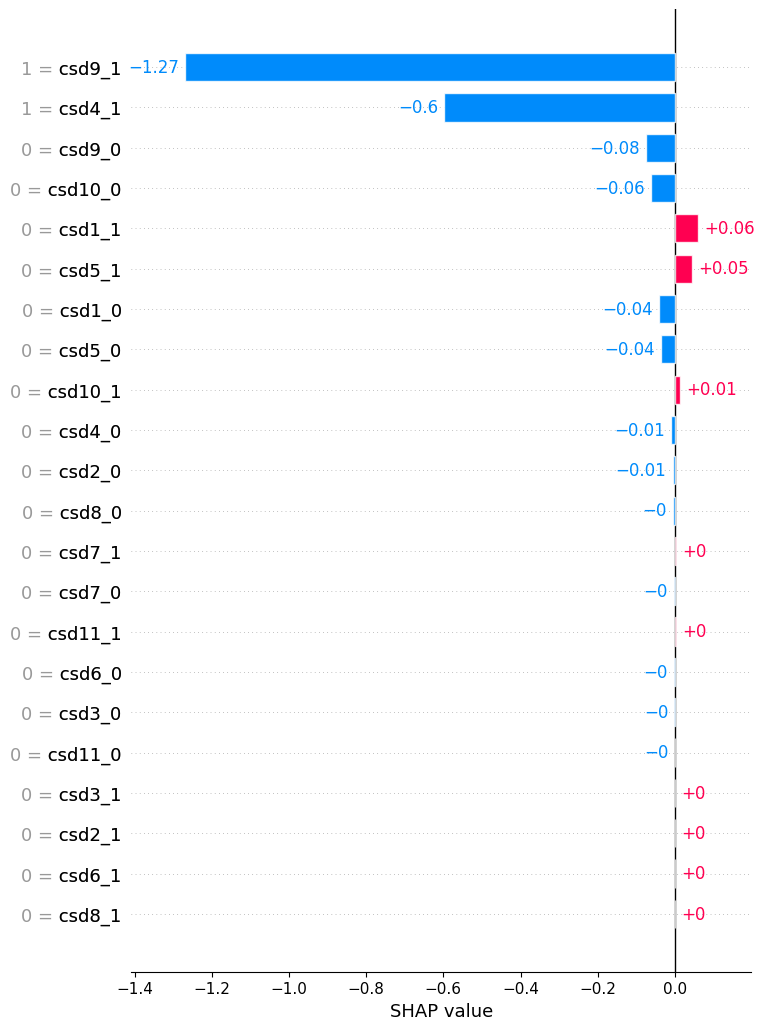

In [16]:
shap.plots.bar(shap_values[2], max_display=22)


In [ ]:
import re
import numpy as np
import shap
import matplotlib.pyplot as plt

def csd_sort_key(col_name):
    """
    Menyusun kolom csdX_Y agar terurut numerik:
    csd1_0 -> csd1_1 -> csd2_0 -> csd2_1 -> ... -> csd11_0 -> csd11_1
    """
    match = re.match(r"csd(\d+)_(\d+)", col_name)
    if match:
        csd_num = int(match.group(1))  # X
        sub_num = int(match.group(2))  # Y
        return (csd_num, sub_num)      # (csd1, 0) akan muncul sebelum (csd1, 1)
    else:
        # Jika nama kolom tidak sesuai pola, taruh di akhir
        return (9999, 9999)

# 1. Sorting kolom X sesuai urutan numeric
sorted_features = sorted(X.columns, key=csd_sort_key)
X_sorted = X[sorted_features]

# 2. Buat mask: hanya ambil nilai ketika fitur == 1
mask = (X.values == 1)

# 3. Buat array SHAP yang hanya berisi nilai ketika fitur aktif, sisanya diganti NaN
active_shap_values = np.where(mask, shap_values.values, np.nan)

# 4. Susun ulang active_shap_values sesuai urutan sorted_features
sorted_indices = [X.columns.get_loc(f) for f in sorted_features]
active_shap_values_sorted = active_shap_values[:, sorted_indices]

# 5. Buat objek Explanation baru dengan nilai yang sudah diurutkan
active_shap_expl_sorted = shap.Explanation(
    values=active_shap_values_sorted,
    base_values=shap_values.base_values,
    data=X_sorted.values,
    feature_names=sorted_features
)

# 6. Plot summary plot
#    Gunakan parameter sort=False agar SHAP tidak mengurutkan ulang berdasarkan mean|SHAP|
shap.summary_plot(
    active_shap_expl_sorted, 
    X_sorted, 
    plot_type="dot", 
    max_display=len(sorted_features),
    sort=False  # <= Inilah kuncinya
)
plt.show()


In [ ]:
median_shap_active = {
    feature: np.nanmedian(active_shap_expl_sorted.values[:, i])
    for i, feature in enumerate(X.columns)
}
max_shap_active = {
    feature: np.nanmax(active_shap_expl_sorted.values[:, i])
    for i, feature in enumerate(X.columns)
}
min_shap_active = {
    feature: np.nanmin(active_shap_expl_sorted.values[:, i])
    for i, feature in enumerate(X.columns)
}

print(" MAX ")

for k, v in max_shap_active.items():
    print(f"  {v:.4f}")

print(" MIN ")

for k, v in min_shap_active.items():
    print(f"  {v:.4f}")

print(" MEDIAN ")

for k, v in median_shap_active.items():
    print(f"  {v:.4f}")

In [ ]:
# -----------------------------
# 5. Median SHAP untuk setiap fitur (hanya fitur aktif)
# -----------------------------
median_shap_active = {
    feature: np.nanmedian(active_shap_expl_sorted.values[:, i])
    for i, feature in enumerate(X.columns)
}

# -----------------------------
# 6. Fungsi klasifikasi Kano (sama seperti sebelumnya)
# -----------------------------
def classify_kano(pos_val, neg_val, threshold=0.0002):
    if abs(pos_val) < threshold or abs(neg_val) < threshold:
        return 'Indifferent'
    elif pos_val <= 0 and neg_val <= 0:
        return 'Must-be'
    elif pos_val <= 0 and neg_val >= 0:
        return 'Reverse'
    elif pos_val > 0 and neg_val < 0:
        return 'Performance'
    elif pos_val > 0 and neg_val >= 0:
        return 'Excitement'
    return 'Unclassified'

# -----------------------------
# 7. Klasifikasi masing-masing CSD berdasarkan median SHAP dari active_shap_expl
# -----------------------------
kano_results_active = {}

for i in range(1, 12):  # csd1 sampai csd11
    pos = median_shap_active.get(f"csd{i}_0", 0)
    neg = median_shap_active.get(f"csd{i}_1", 0)
    kano_results_active[f"csd{i}"] = classify_kano(pos, neg)

# -----------------------------
# 8. Output
# -----------------------------
print("Median SHAP values (active only):")
for k, v in median_shap_active.items():
    print(f"  {k}: {v:.4f}")

print("\nKlasifikasi Kano (active only):")
for k, v in kano_results_active.items():
    print(f"  {k}: {v}")


# EXTRAS

In [ ]:
import pandas as pd

# Load data dari CSV
produk = pd.read_csv(r"D:\Kuliah\Semester 8\Kepstun 1 2\Dashboard\Testdrive\produk_SC.csv")
ulasan = pd.read_csv(r"D:\Kuliah\Semester 8\Kepstun 1 2\Dashboard\Testdrive\Labeled\Labeled 1k SC_onehot.csv")

# Merge berdasarkan product_id
merge1 = ulasan.merge(produk, on='product_id', how='left')

# Baris ulasan yang belum match
belum_termerge = merge1[merge1['nama_produk'].isna()]

# Drop semua kolom produk kecuali 'old_product_id'
# Drop kolom duplikat dari produk yang mungkin menyebabkan konflik, kecuali old_product_id
produk_filtered = produk.drop(columns=[col for col in produk.columns if col != 'old_product_id' and col in belum_termerge.columns])

# Lakukan merge ulang
merge2 = belum_termerge.merge(produk_filtered, left_on='product_id', right_on='old_product_id', how='left')

# Gabungkan hasil merge sukses
hasil_akhir = pd.concat([
    merge1[~merge1['nama_produk'].isna()],
    merge2
])

# Reset index
hasil_akhir.reset_index(drop=True, inplace=True)

# Tampilkan hasil akhir
hasil_akhir


In [ ]:
hasil_akhir.to_csv(r"D:\Kuliah\Semester 8\Kepstun 1 2\Dashboard\Testdrive\merged_onehot.csv",index=False)

In [ ]:
import pandas as pd
import re

# Load your dataset
# Make sure to replace 'your_file.csv' with the actual path to your file
try:
    df = pd.read_csv(r"D:\Kuliah\Semester 8\Kepstun 1 2\Dashboard\Testdrive\merged_onehot.csv")
except FileNotFoundError:
    print("Error: The file 'your_file.csv' was not found. Please check the file path.")
    exit()

# Ensure 'product_url' and 'harga' columns exist
if 'product_url' not in df.columns or 'harga' not in df.columns:
    print("Error: The DataFrame must contain 'product_url' and 'harga' columns.")
    exit()

# Create a copy of the harga column to store adjusted hargas
df['adjusted_harga'] = df['harga'].copy()

# Function to adjust the harga based on the URL
def adjust_harga_by_url(row):
    url = str(row['product_url']) # Ensure URL is a string
    harga = row['harga']
    adjusted_harga = row['adjusted_harga'] # Start with the current harga

    if 'slop' in url:
        # Remove hyphens before 'slop' to correctly identify the character
        # We use a regex to find the character(s) right before 'slop'
        # after removing hyphens that might be there.
        # For example, 'product-2-slop' -> we look for '2'
        # 'product2slop' -> we look for '2'
        # 'product-slop' -> no number before, ignore
        
        # Find 'slop' and the part immediately before it
        match = re.search(r'([^-]+)-?slop', url)
        if match:
            char_before_slop_group = match.group(1)
            # Take the last character of that group, in case there are multiple (e.g. "item12-slop")
            if char_before_slop_group:
                char_before = char_before_slop_group[-1]
                if char_before.isdigit():
                    divisor = int(char_before)
                    if divisor > 0: # Avoid division by zero
                        adjusted_harga = harga / divisor
    return adjusted_harga

# Apply the function to each row
df['adjusted_harga'] = df.apply(adjust_harga_by_url, axis=1)

# Save the updated DataFrame to a new CSV file
try:
    df.to_csv(r"D:\Kuliah\Semester 8\Kepstun 1 2\Dashboard\Testdrive\adjusted_hargas_output.csv", index=False)
    print("Processing complete. The updated data has been saved to 'adjusted_hargas_output.csv'")
    print("\nFirst 5 rows of the processed data:")
    print(df.head())
except Exception as e:
    print(f"Error saving the file: {e}")

In [ ]:

import pandas as pd

# Load dataset
df = pd.read_csv(r"D:\Kuliah\Semester 8\Kepstun 1 2\Dashboard\Testdrive\adjusted_hargas_output.csv")

# Definisi rentang harga dan label
bins = [0, 50000, 120000, 250000, 750000, float('inf')]
labels = ['<50k', '50k-120k', '120k-250k', '250k-750k', '>750k']
    
# Membuat kolom kategori harga
df['harga_range'] = pd.cut(df['adjusted_harga'], bins=bins, labels=labels)

# Simpan ke file berdasarkan kategori harga
for label in labels:
    subset = df[df['harga_range'] == label]
    filename = f"D:/Kuliah/Semester 8/Kepstun 1 2/Dashboard/Testdrive/products_{label}.csv"\
        .replace('>', 'over').replace('<', 'under').replace('-', '_')
    subset.to_csv(filename, index=False)
    print(f'Saved {filename} with {len(subset)} rows')


In [ ]:
j=0
df = pd.read_csv(f"D:\Kuliah\Semester 8\Kepstun 1 2\Dashboard\Testdrive\products_tokopedia.csv", index_col=False)
product_ids = [
    b if a == 0 else a
    for a, b, c in zip(df["old_product_id"], df["product_id"], df["rating"])
    if pd.notna(c)
]


url = "https://gql.tokopedia.com/graphql/PDPGetLayoutQuery"




def scrape_data(product_id,pages):
    global j
    headers = {
    "Content-Type": "application/json",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
    }

    payload = [{
        'operationName':"productReviewList",
        'query': "query productReviewList($productID: String!, $page: Int!, $limit: Int!, $sortBy: String, $filterBy: String) {\n  productrevGetProductReviewList(productID: $productID, page: $page, limit: $limit, sortBy: $sortBy, filterBy: $filterBy) {\n    productID\n    list {\n      id: feedbackID\n      variantName\n      message\n      productRating\n      reviewCreateTime\n      reviewCreateTimestamp\n      isReportable\n      isAnonymous\n      imageAttachments {\n        attachmentID\n        imageThumbnailUrl\n        imageUrl\n        __typename\n      }\n      videoAttachments {\n        attachmentID\n        videoUrl\n        __typename\n      }\n      reviewResponse {\n        message\n        createTime\n        __typename\n      }\n      user {\n        userID\n        fullName\n        image\n        url\n        __typename\n      }\n      likeDislike {\n        totalLike\n        likeStatus\n        __typename\n      }\n      stats {\n        key\n        formatted\n        count\n        __typename\n      }\n      badRatingReasonFmt\n      __typename\n    }\n    shop {\n      shopID\n      name\n      url\n      image\n      __typename\n    }\n    hasNext\n    totalReviews\n    __typename\n  }\n}\n",
        'variables': {
            'productID': product_id, 
            'page': pages, 
            'limit': 50, 
            'sortBy': "informative_score desc", 
            'filterBy': ""
            }
    }]


    req = req = requests.post(url, json=payload, headers=headers).json()
    rows = req[0]['data']['productrevGetProductReviewList']['list']
    # print(len(rows))
    stop=False
    scrape_data = []
    for i in range(0, len(rows)):
        ulasan = rows[i]['message']
        rating = rows[i]['productRating']
        time = rows[i]['reviewCreateTime']
        scrape_data.append((product_id,
                    ulasan, 
                    rating, 
                    time
                    ))
        j = j+1
        print('Ulasan : ', j)
        
    if len(scrape_data)==0:
        stop=True

    return scrape_data,stop

all_data = []
k=0



In [ ]:
import time

try:
    for id in product_ids[:10800]:
        print('Id : ', k)
        k = k + 1
        for i in range(0,10000):
            
            param = params[i]
            data,stop = scrape_data(str(id),i+1)
            all_data.extend(data)
            print(i)
            if stop == True:
                break
            time.sleep(0.1)
except Exception as a:
    print(a)
    df = pd.DataFrame(all_data, columns=['product_id',
                                        'ulasan',
                                        'rating',
                                        'time'])

In [2]:
import requests


url = "https://gql.tokopedia.com/graphql/PDPGetLayoutQuery"



product_url = "https://www.tokopedia.com/bliss-scents/peppermint-essential-oil-diffuser-aromatherapy-aromaterapi-1731145883469055928?extParam=ivf%3Dfalse%26keyword%3Dessential+oil%26search_id%3D20250609192215577BCC914F9E551BD6JO%26src%3Dsearch"

headers = {
    'cookie': 'bm_sv=5BE71833C18336BB6F06660FA482A21E~YAAQGYM0FxLQOVOXAQAA/tglVhxOyaaQ16Si//d0oH6hVMCmXliZUG+axa8pnrAdnpBPHfR2iVwz0/9tnOy1d1AeWuQdajq1RYmPOhEGl0Yt8wshAEscDxi75jx5Mw3qoxUrO7OBpJEWfYmp/vCUO9NpiM4UhsP7KeeZUKEgrTHISwR5JUF+nGNgSQpmjQa10N3deBUlpe+8eoFys79HCBhMb6JoEY2bYmDiwUKtm9LcT2tC6P7YnONhUwhOJ7n6mVbkCQ==~1; Domain=.tokopedia.com; Path=/; Expires=Mon, 09 Jun 2025 21:02:48 GMT; Max-Age=5958; Secure', # <--- PENTING!
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/137.0.0.0 Safari/537.36 Edg/137.0.0.0',
    # 'referer': product_url,
    # 'x-device': 'desktop',
    # 'x-source': 'tokopedia-lite',
    'x-tkpd-akamai': 'pdpGetLayout',
    # 'x-tkpd-lite-service': 'zeus',
    # 'x-version': 'bc9586e',
    # 'x-price-center': 'true',
    # 'accept': '*/*',
    'content-type': 'application/json',
    # 'sec-ch-ua': '"Microsoft Edge";v="137", "Chromium";v="137", "Not/A)Brand";v="24"',
    # 'sec-ch-ua-mobile': '?0',
    # 'sec-ch-ua-platform': '"Windows"',
    # 'bd-device-id': '2721592134911884151'
}


payload = [
  {
    'operationName': "PDPGetLayoutQuery",
    'variables': {
      'shopDomain': "hggjakarta",
      'productKey': "happy-green-vetiver-m-d-essential-oil-10-ml-warna-coklat-bkn-hitam-1731179012841374990",
      'layoutID': "",
      'apiVersion': 1,
    },
    'query': "fragment ProductVariant on pdpDataProductVariant {\n  errorCode\n  parentID\n  defaultChild\n  sizeChart\n  totalStockFmt\n  variants {\n    productVariantID\n    variantID\n    name\n    identifier\n    option {\n      picture {\n        urlOriginal: url\n        urlThumbnail: url100\n        __typename\n      }\n      productVariantOptionID\n      variantUnitValueID\n      value\n      hex\n      stock\n      __typename\n    }\n    __typename\n  }\n  children {\n    productID\n    price\n    priceFmt\n    slashPriceFmt\n    discPercentage\n    optionID\n    optionName\n    productName\n    productURL\n    picture {\n      urlOriginal: url\n      urlThumbnail: url100\n      __typename\n    }\n    stock {\n      stock\n      isBuyable\n      stockWordingHTML\n      minimumOrder\n      maximumOrder\n      __typename\n    }\n    isCOD\n    isWishlist\n    campaignInfo {\n      campaignID\n      campaignType\n      campaignTypeName\n      campaignIdentifier\n      background\n      discountPercentage\n      originalPrice\n      discountPrice\n      stock\n      stockSoldPercentage\n      startDate\n      endDate\n      endDateUnix\n      appLinks\n      isAppsOnly\n      isActive\n      hideGimmick\n      isCheckImei\n      minOrder\n      showStockBar\n      __typename\n    }\n    thematicCampaign {\n      additionalInfo\n      background\n      campaignName\n      icon\n      __typename\n    }\n    ttsPID\n    ttsSKUID\n    __typename\n  }\n  __typename\n}\n\nfragment ProductMedia on pdpDataProductMedia {\n  media {\n    type\n    urlOriginal: URLOriginal\n    urlThumbnail: URLThumbnail\n    urlMaxRes: URLMaxRes\n    videoUrl: videoURLAndroid\n    prefix\n    suffix\n    description\n    variantOptionID\n    __typename\n  }\n  videos {\n    source\n    url\n    __typename\n  }\n  __typename\n}\n\nfragment ProductCategoryCarousel on pdpDataCategoryCarousel {\n  linkText\n  titleCarousel\n  applink\n  list {\n    categoryID\n    icon\n    title\n    isApplink\n    applink\n    __typename\n  }\n  __typename\n}\n\nfragment ProductHighlight on pdpDataProductContent {\n  name\n  price {\n    value\n    currency\n    priceFmt\n    slashPriceFmt\n    discPercentage\n    __typename\n  }\n  campaign {\n    campaignID\n    campaignType\n    campaignTypeName\n    campaignIdentifier\n    background\n    percentageAmount\n    originalPrice\n    discountedPrice\n    originalStock\n    stock\n    stockSoldPercentage\n    threshold\n    startDate\n    endDate\n    endDateUnix\n    appLinks\n    isAppsOnly\n    isActive\n    hideGimmick\n    showStockBar\n    __typename\n  }\n  thematicCampaign {\n    additionalInfo\n    background\n    campaignName\n    icon\n    __typename\n  }\n  stock {\n    useStock\n    value\n    stockWording\n    __typename\n  }\n  variant {\n    isVariant\n    parentID\n    __typename\n  }\n  wholesale {\n    minQty\n    price {\n      value\n      currency\n      __typename\n    }\n    __typename\n  }\n  isCashback {\n    percentage\n    __typename\n  }\n  isTradeIn\n  isOS\n  isPowerMerchant\n  isWishlist\n  isCOD\n  preorder {\n    duration\n    timeUnit\n    isActive\n    preorderInDays\n    __typename\n  }\n  __typename\n}\n\nfragment ProductCustomInfo on pdpDataCustomInfo {\n  icon\n  title\n  isApplink\n  applink\n  separator\n  description\n  __typename\n}\n\nfragment ProductInfo on pdpDataProductInfo {\n  row\n  content {\n    title\n    subtitle\n    applink\n    __typename\n  }\n  __typename\n}\n\nfragment ProductDetail on pdpDataProductDetail {\n  content {\n    title\n    subtitle\n    applink\n    showAtFront\n    isAnnotation\n    __typename\n  }\n  __typename\n}\n\nfragment ProductDataInfo on pdpDataInfo {\n  icon\n  title\n  isApplink\n  applink\n  content {\n    icon\n    text\n    __typename\n  }\n  __typename\n}\n\nfragment ProductSocial on pdpDataSocialProof {\n  row\n  content {\n    icon\n    title\n    subtitle\n    applink\n    type\n    rating\n    __typename\n  }\n  __typename\n}\n\nfragment ProductDetailMediaComponent on pdpDataProductDetailMediaComponent {\n  title\n  description\n  contentMedia {\n    url\n    ratio\n    type\n    __typename\n  }\n  show\n  ctaText\n  __typename\n}\n\nfragment PdpDataComponentShipmentV4 on pdpDataComponentShipmentV4 {\n  data {\n    productID\n    warehouse_info {\n      warehouse_id\n      is_fulfillment\n      district_id\n      postal_code\n      geolocation\n      city_name\n      ttsWarehouseID\n      __typename\n    }\n    useBOVoucher\n    isCOD\n    metadata\n    __typename\n  }\n  __typename\n}\n\nquery PDPGetLayoutQuery($shopDomain: String, $productKey: String, $layoutID: String, $apiVersion: Float, $userLocation: pdpUserLocation, $extParam: String, $tokonow: pdpTokoNow, $deviceID: String) {\n  pdpGetLayout(shopDomain: $shopDomain, productKey: $productKey, layoutID: $layoutID, apiVersion: $apiVersion, userLocation: $userLocation, extParam: $extParam, tokonow: $tokonow, deviceID: $deviceID) {\n    requestID\n    name\n    pdpSession\n    basicInfo {\n      alias\n      createdAt\n      isQA\n      id: productID\n      shopID\n      shopName\n      minOrder\n      maxOrder\n      weight\n      weightUnit\n      condition\n      status\n      url\n      needPrescription\n      catalogID\n      isLeasing\n      isBlacklisted\n      isTokoNow\n      ttsPID\n      ttsSKUID\n      ttsShopID\n      menu {\n        id\n        name\n        url\n        __typename\n      }\n      category {\n        id\n        name\n        title\n        breadcrumbURL\n        isAdult\n        isKyc\n        minAge\n        detail {\n          id\n          name\n          breadcrumbURL\n          isAdult\n          __typename\n        }\n        ttsID\n        ttsDetail {\n          id\n          name\n          breadcrumbURL\n          isAdult\n          __typename\n        }\n        __typename\n      }\n      txStats {\n        transactionSuccess\n        transactionReject\n        countSold\n        paymentVerified\n        itemSoldFmt\n        __typename\n      }\n      stats {\n        countView\n        countReview\n        countTalk\n        rating\n        __typename\n      }\n      productID\n      ttsPID\n      ttsSKUID\n      ttsShopID\n      isAggregatedWithTTS\n      __typename\n    }\n    components {\n      name\n      type\n      position\n      data {\n        ...ProductMedia\n        ...ProductHighlight\n        ...ProductInfo\n        ...ProductDetail\n        ...ProductSocial\n        ...ProductDataInfo\n        ...ProductCustomInfo\n        ...ProductVariant\n        ...ProductCategoryCarousel\n        ...ProductDetailMediaComponent\n        ...PdpDataComponentShipmentV4\n        __typename\n      }\n      __typename\n    }\n    __typename\n  }\n}\n"
  }]


req = requests.post(url, json=payload, headers=headers).json()
print(req)
# rows = req[0]['data']['productrevGetProductReviewList']['list']
# print(len(rows))



[{'data': {'pdpGetLayout': {'requestID': 'd13sc932okd06njs7be0', 'name': 'Default Layout', 'pdpSession': '{"ttspi":1729817485551764750,"ttsku":1731179012841374990,"sid":830254,"ttssid":7495811958701984014,"sd":"hggjakarta","stier":2,"cat":{"id":2272,"ttsid":951176,"d":[{"name":"Kesehatan","burl":"https://www.tokopedia.com/p/kesehatan","id":715},{"name":"Essential Oil","burl":"https://www.tokopedia.com/p/kesehatan/essential-oil","id":2272}],"ttsd":[{"name":"Health","id":700645},{"name":"Alternative Medications \\u0026 Treatments","id":950792},{"name":"Essential Oils for Aromatherapy","id":951176}]},"pid":566282850,"ppn":"Happy Green Vetiver M.D. Essential Oil (10 ml) -Warna Coklat bkn Hitam","dcid":16590115283,"cp":{"lr":{}},"opr":155000,"pr":155000,"mo":1,"pn":"Happy Green Vetiver M.D. Essential Oil (10 ml) -Warna Coklat bkn Hitam - 10 ml","purl":"https://www.tokopedia.com/hggjakarta/happy-green-vetiver-m-d-essential-oil-10-ml-warna-coklat-bkn-hitam-1731179012841374990","pa":"happy-gre

In [2]:
import requests


url = "https://gql.tokopedia.com/graphql/productReviewList"


headers = {
"Content-Type": "application/json",
"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"
}

payload = [{
        'operationName':"productReviewList",
        'query': "query productReviewList($productID: String!, $page: Int!, $limit: Int!, $sortBy: String, $filterBy: String) {\n  productrevGetProductReviewList(productID: $productID, page: $page, limit: $limit, sortBy: $sortBy, filterBy: $filterBy) {\n    productID\n    list {\n      id: feedbackID\n      variantName\n      message\n      productRating\n      reviewCreateTime\n      reviewCreateTimestamp\n      isReportable\n      isAnonymous\n      imageAttachments {\n        attachmentID\n        imageThumbnailUrl\n        imageUrl\n        __typename\n      }\n      videoAttachments {\n        attachmentID\n        videoUrl\n        __typename\n      }\n      reviewResponse {\n        message\n        createTime\n        __typename\n      }\n      user {\n        userID\n        fullName\n        image\n        url\n        __typename\n      }\n      likeDislike {\n        totalLike\n        likeStatus\n        __typename\n      }\n      stats {\n        key\n        formatted\n        count\n        __typename\n      }\n      badRatingReasonFmt\n      __typename\n    }\n    shop {\n      shopID\n      name\n      url\n      image\n      __typename\n    }\n    hasNext\n    totalReviews\n    __typename\n  }\n}\n",
        'variables': {
            'productID': "2176717541", 
            'page': 1, 
            'limit': 50, 
            'sortBy': "informative_score desc", 
            'filterBy': ""
            }
    }]


req = requests.post(url, json=payload, headers=headers).json()
print(req)
rows = req[0]['data']['productrevGetProductReviewList']['list']
# print(len(rows))



[{'data': {'productrevGetProductReviewList': {'productID': '2176717541', 'list': [{'id': '1114897453', 'variantName': '', 'message': 'pengemasan aman sampai ditujuan .penggiriman cepat seller cepet tanggap menjqwab', 'productRating': 4, 'reviewCreateTime': '1730875166', 'reviewCreateTimestamp': '7 bulan lalu', 'isReportable': False, 'isAnonymous': True, 'imageAttachments': [{'attachmentID': '138685700', 'imageThumbnailUrl': 'https://images.tokopedia.net/img/cache/200-square/bjFkPX/2024/11/6/f76e3178-f753-4e8f-b2f8-90be2fd5c011.jpg', 'imageUrl': 'https://images.tokopedia.net/img/cache/600/bjFkPX/2024/11/6/f76e3178-f753-4e8f-b2f8-90be2fd5c011.jpg', '__typename': 'reviewAttachmentPDPType'}], 'videoAttachments': [{'attachmentID': '138685701', 'videoUrl': 'https://vod-stream.tokopedia.net/view/ttvideo?source=wKpVIv&ttvid=v104acg5000cct7dbbnog65rruhi56j0', '__typename': 'productrevVideoAttachmentPDPType'}], 'reviewResponse': {'message': 'Terima kasih telah berbelanja di toko jaya kimia. Bagi